# Lending Club Case Study Notebook

##### Goal - Apply EDA concepts on the provided data to arrive at Conclusions and Recommendations to Consumer finance company on its Loan disbursal process.



In [201]:
# Load the required Libraries

# 1. pandas for dataframe utilities
import pandas as pd
print('pandas version\t:',pd.__version__)

# 2. numpy for numerical utilities
import numpy as np
print('numpy version\t:',np.__version__)

# 3. seaborn for data visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

# 4. matplotlib.pyplot for chart/graph plotting
import matplotlib.pyplot as plt

# 5. plotly.express for chart/graph plotting
import plotly.express as px #plotting

# 6. datetime for date/time functions
import datetime as dt

# 7. warnings to ignore known warnings
import warnings #warning
warnings.filterwarnings('ignore')

# 8. python version
import platform
print('Python version\t:',platform.python_version())

pandas version	: 2.1.4
numpy version	: 1.26.4
seaborn version	: 0.12.2
Python version	: 3.11.7


In [202]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [203]:
# Load the dataset
df_loan = pd.read_csv('loan.csv')

# Load the data dictionary
# df_dict = pd.read_csv('Data_Dictionary.xlsx')

In [204]:
# Basic checks on the loan Data to understand how it is organised and populated

# print shape of data to understand 
# No. of Columns, rows, 
# RangeIndex mentions the total no. of rows
# Columns grouped by data types 
# overall memory usage

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [205]:
# Print first five rows of the dataset
df_loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [206]:
# Column names and data types of each column
df_loan.info(verbose=True, max_cols=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

Text(0, 0.5, 'Data type')

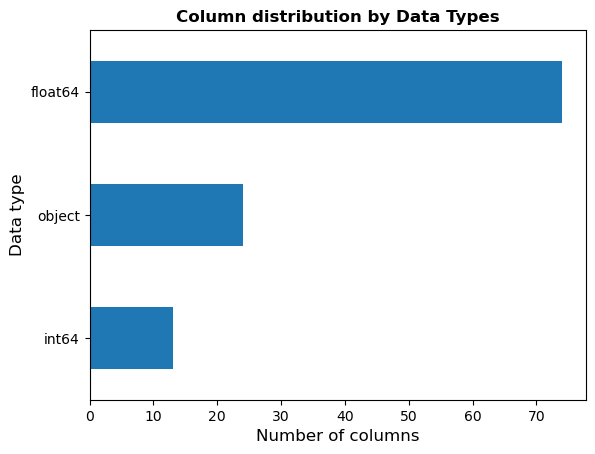

In [207]:
# Visual representation of the Column Data types
df_loan.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Column distribution by Data Types',fontsize=12,weight='bold')
plt.xlabel('Number of columns',fontsize=12)
plt.ylabel('Data type',fontsize=12)

In [208]:
# Calculating some statistical data like percentile, mean and std for the dataset
print(df_loan.describe())

              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00           

## Data Cleaning and Manipulation

- Identifying columns with most missing values and removing them
- Identifying columns which can be removed based on having missing values and no impact on analysis
- Identifying and removing columns which are mostly unique like 'id'
- Check if their are rows having too many missing or null values which might be candidate for removal
- Finally, remove the columns based on the requirement for the final analysis as some columns may not be required to be part of final analysis

**Identifying columns with most missing values and removing them**

In [209]:
print(df_loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [210]:
# List the columns based on the percentage of null values
df_nulls = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)
df_nulls[ df_nulls > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.59
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


**Lets remove the columns which are having more than 30% missing values**

In [211]:
df_loan.drop(df_nulls[ df_nulls > 30 ].index, axis=1, inplace=True)
print(df_loan.shape)

(39717, 53)


In [212]:
# Again check the columns based on the percentage of null values
df_nulls = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)
df_nulls[ df_nulls > 0 ]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [213]:
# List the Columns which have all the same values or no unique values
df_loan.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [214]:
# List the Columns which have high occurrence of unique values
df_loan.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

## Identification and Removal of Irrelevant Columns ##

**1. Columns with no unique values**
tax_liens,
delinq_amnt,
chargeoff_within_12_mths,
acc_now_delinq,
application_type,
policy_code,
collections_12_mths_ex_med,
initial_list_status,
pymnt_plan

**2. Columns with All unique values** id, url and member_id are all unique. We can use one of them as identifier and drop other two

**3. Columns which are not useful** emp_title and title columns seem to be just designations. Hence they can be removed

In [215]:
# 1. Columns with no unique values
df_loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1, inplace=True)

In [216]:
# 2. Columns with All unique values
df_loan.drop(['url', 'member_id'], axis=1, inplace=True)

In [217]:
# 3. Columns which are not useful 
df_loan.drop(['emp_title', 'title'], axis=1, inplace=True)

## Missing values in rows ##

**1. Check what is the maximum number of missing values in a row. If it is a small number say less than 5. Ignore it**

In [218]:
# Max number of missing values in rows
print((df_loan.isnull().sum(axis=1)).max())

2


In [219]:
# Find the % of missing values in remaining columns
df_nulls = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)
df_nulls[ df_nulls > 0 ]

emp_length             2.71
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

**The number of null values seem to be in irrelevant columns which we will drop in our final evaluation of important columns. Hence, leaving them be for now**

In [220]:
# Print the remaining columns in the dataset
print(df_loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [221]:
df_loan.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000          4975.00   36 months   10.65%   
1  1077430       2500         2500          2500.00   60 months   15.27%   
2  1077175       2400         2400          2400.00   36 months   15.96%   
3  1076863      10000        10000         10000.00   36 months   13.49%   
4  1075358       3000         3000          3000.00   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
4        67.79     B        B5     1 year           RENT    80000.00   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
4     Source Verified  Dec-11      Current           other    972xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0           Jan-85               1         3   
1         GA  1.00            0           Apr-99               5         3   
2         IL  8.72            0           Nov-01               2         2   
3         CA 20.00            0           Feb-96               1        10   
4         OR 17.94            0           Jan-96               0        15   

   pub_rec  revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648     83.70%          9       0.00           0.00   
1        0       1687      9.40%          4       0.00           0.00   
2        0       2956     98.50%         10       0.00           0.00   
3        0       5598        21%         37       0.00           0.00   
4        0      27783     53.90%         38     524.06         524.06   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   
1      1008.71          1008.71           456.46         435.17   
2      3005.67          3005.67          2400.00         605.67   
3     12231.89         12231.89         10000.00        2214.92   
4      3513.33          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62             May-16                  0.00  
1           119.66             Sep-13                  0.00  
2           649.91             May-16                  0.00  
3           357.48             Apr-16                  0.00  
4            67.79             May-16                  0.00

## Revisiting the Columns which are required for final decision ##
**The basis for revisiting the leftover column is to check whether they are relevant customer attributes or loan attributes which are useful to make a decision whether to provide the loan or not. So, any column which helps us to take a decision 'before' loan sanction, is 'relevant' otherwise it is irrelevant.**
- As per provided Data Dictionalry following columns represent some data which is gathered after the Loan is sanctioned and hence we will drop these columns ->'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc', 'pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d'

**Masked column, hence it will be dropped**
- 'zip_code'

**Internal data of the Company, not required for making decision**
- 'funded_amnt_inv

In [222]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
df_loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

# Zip_code is masked data and hence removing it
df_loan.drop(['zip_code'],axis=1, inplace=True)

# funded_amnt_inv is a Company internal data and hence not required at the time of making the decision
df_loan.drop(['funded_amnt_inv'],axis=1, inplace=True)

# Leftover columns and rows
print(df_loan.shape)

(39717, 18)


## Data shortlisting based on Business perspective ##
- In order to make a decision on whether to Lend money or not, the Loans which are currently being serviced are not counted. Only the loans which are **Fully paid** or **Charged Off** are required. Hence, we will remove the Loans with status **Current**

In [224]:
df_loan = df_loan[df_loan.loan_status != 'Current']
print(df_loan.shape)

(38577, 18)


**'Term' column has padded spaces in it which needs to be removed**

In [225]:
#Checking unique values for term column
df_loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [226]:
#Stripping empty space in values in term
df_loan['term'] = df_loan.term.str.strip()
df_loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [227]:
df_loan.head()

id  loan_amnt  funded_amnt       term int_rate  installment grade  \
0  1077501       5000         5000  36 months   10.65%       162.87     B   
1  1077430       2500         2500  60 months   15.27%        59.83     C   
2  1077175       2400         2400  36 months   15.96%        84.33     C   
3  1076863      10000        10000  36 months   13.49%       339.31     C   
5  1075269       5000         5000  36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT    24000.00            Verified  Dec-11   
1        C4   < 1 year           RENT    30000.00     Source Verified  Dec-11   
2        C5  10+ years           RENT    12252.00        Not Verified  Dec-11   
3        C1  10+ years           RENT    49200.00     Source Verified  Dec-11   
5        A4    3 years           RENT    36000.00     Source Verified  Dec-11   

   loan_status         purpose addr_state   dti  pub_rec_bankruptcies  
0   Fully Paid     credit_card         AZ 27.65                  0.00  
1  Charged Off             car         GA  1.00                  0.00  
2   Fully Paid  small_business         IL  8.72                  0.00  
3   Fully Paid           other         CA 20.00                  0.00  
5   Fully Paid         wedding         AZ 11.20                  0.00

## Data Conversion ##

**int_rate** columns has **'%'** sign in it. This needs to be removed. Also, data type needs to be converted to float

**issue_d** has date values. It needs to be converted to Date.

In [233]:
# Data Conversion to float
df_loan['int_rate'] = df_loan.int_rate.str.strip('%').astype(float)

AttributeError: Can only use .str accessor with string values!

In [234]:
# Data conversion to Date
df_loan['issue_d'] = pd.to_datetime(df_loan.issue_d, format='%b-%y')

In [232]:
# Leftover Columns in the dataframe
df_loan.head()

id  loan_amnt  funded_amnt       term  int_rate  installment grade  \
0  1077501       5000         5000  36 months     10.65       162.87     B   
1  1077430       2500         2500  60 months     15.27        59.83     C   
2  1077175       2400         2400  36 months     15.96        84.33     C   
3  1076863      10000        10000  36 months     13.49       339.31     C   
5  1075269       5000         5000  36 months      7.90       156.46     A   

  sub_grade emp_length home_ownership  annual_inc verification_status  \
0        B2  10+ years           RENT    24000.00            Verified   
1        C4   < 1 year           RENT    30000.00     Source Verified   
2        C5  10+ years           RENT    12252.00        Not Verified   
3        C1  10+ years           RENT    49200.00     Source Verified   
5        A4    3 years           RENT    36000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65   
1 2011-12-01  Charged Off             car         GA  1.00   
2 2011-12-01   Fully Paid  small_business         IL  8.72   
3 2011-12-01   Fully Paid           other         CA 20.00   
5 2011-12-01   Fully Paid         wedding         AZ 11.20   

   pub_rec_bankruptcies  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
5                  0.00

## Handling 'null' values ##
**Evaluate whether we can impute 'null' values. If not, remove them**

In [235]:
# Get the null values info from the Dataset
print(df_loan.isnull().sum().sort_values(ascending=False))

emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [242]:
# Get details of 'emp_length' column
df_loan.emp_length.value_counts()

AttributeError: 'DataFrame' object has no attribute 'emp_length'

In [240]:
# Removing the null values from emp_length column as it seems feasible when compared 
# to the total number of rows
df_loan.dropna(subset=['emp_length'])

KeyError: ['emp_length']

In [241]:
# Get details of 'pub_rec_bankruptcies' column
df_loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.00    36238
1.00     1637
2.00        5
Name: count, dtype: int64

In [243]:
# Since pub_rec_bankruptcies column is sparsely populated and is having 0 for most of the values
# we will fill 0 for null values in this column
df_loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [244]:
# There should be no missing values in the dataset
print(df_loan.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [246]:
df_loan.shape

(38577, 17)

In [248]:
# Check rows for duplicates and remove if present
df_loan.drop_duplicates()
df_loan.shape

(38577, 17)

In [249]:
# Take note of Columns
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   funded_amnt           38577 non-null  int64         
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose              

## Data Conversion ##

- **term** column needs to be converted to 'int' after removing string literal 'months'
- **grade** column can be converted to 'category' type
- **sub_grade** column can be converted to 'category' type
- **emp_length** column needs to keep only number part and drop any string or alphanumeric
- **home_ownership** column can be converted to 'category' type
- **verification_status** column can be converted to 'category' type
- **purpose** column can be converted to 'category' type
- **addr_state** column can be converted to 'category' type
- **issue_d** can be converted to 'datetime'

In [255]:
df_loan.term=df_loan.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
df_loan.int_rate=df_loan.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
df_loan.grade=df_loan.grade.astype('category')
df_loan.sub_grade=df_loan.sub_grade.astype('category')
df_loan.emp_length=df_loan.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
df_loan.home_ownership=df_loan.home_ownership.astype('category')
df_loan.verification_status=df_loan.verification_status.astype('category')
df_loan.issue_d=pd.to_datetime(df_loan.issue_d,format='%b-%y')
df_loan.purpose=df_loan.purpose.astype('category')
df_loan.addr_state=df_loan.addr_state.astype('category')

AttributeError: 'DataFrame' object has no attribute 'emp_length'


## Derived Column ##
- **issue_d_year** can be inferred from 'issue_d'
- **issue_d_month**  can be inferred from 'issue_d'
- **issue_d_day**  can be inferred from 'issue_d'

In [260]:
df_loan['issue_d_year']=pd.to_datetime(df_loan.issue_d,format='%b-%y').dt.year
df_loan['issue_d_month']=pd.to_datetime(df_loan.issue_d,format='%b-%y').dt.month
df_loan['issue_d_day']=pd.to_datetime(df_loan.issue_d,format='%b-%y').dt.weekday

In [261]:
# Print the remaining columns info
print(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38577 non-null  int64         
 1   loan_amnt             38577 non-null  int64         
 2   funded_amnt           38577 non-null  int64         
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   home_ownership        38577 non-null  category      
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  category      
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose              

In [ ]:
# Column seggregation into different types
num_cols=['loan_amnt','funded_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_d_year','issue_d_month']
cat_cols=['grade','sub_grade','verification_status','purpose','addr_state','term','home_ownership','emp_length']
id_col=['id']
extra_cols=['issue_d','installment','loan_status']

## Outlier analysis and Handling ##

**Outlier check will be performed on following continuous variables and handled**

In [267]:
# Plotting continuous variable 'loan_amnt'
px.box(df_loan,y='loan_amnt',width=500,height=500,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

In [268]:
## using plotly for interactive interaction and value retrival from chart for upper fence.
px.box(df_loan,y='int_rate',width=500,height=500,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [271]:

px.box(df_loan,y='annual_inc',width=500,height=500,title='Borrower Annual Income',labels={'annual_inc':'Annual Income'}).show()
# Clearly the outliers lie in the Annual income distribution as it is seen increasing exponentially around 98 percentile. 
# Lets try to remove the oultliers

In [270]:
# Get the Summary Metrics in order to find out the percentile to be used to remove outliers
df_loan['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999])

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
10%       30000.00
25%       40000.00
50%       58868.00
75%       82000.00
90%      115000.00
95%      140004.00
96%      150000.00
97%      165000.00
98%      187000.00
99%      234144.00
99.5%    300000.00
99.9%    700000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [278]:
## Plot a line chart to visulaize the outliers
px.line(sorted(df_loan.annual_inc),width=750,height=350,title='Annual Income',labels={'value':'Annual Income','index':'Data count'}).show()


In [275]:
#Remove the outliers and remove the records above 95%
df_loan = df_loan[df_loan['annual_inc'] <= df_loan['annual_inc'].quantile(0.99)]
df_loan.annual_inc.describe()

count    34498.00
mean     56835.19
std      23230.48
min       4000.00
25%      39500.00
50%      54000.00
75%      73000.00
max     113000.00
Name: annual_inc, dtype: float64

In [276]:
# Plot the annual_inc box plot again
px.box(df_loan,y='annual_inc',width=500,height=500,title='Borrower Annual Income',labels={'annual_inc':'Annual Income'}).show()
## We have successfully removed the outliers in annual_in data

In [280]:
## Distribution is uniform. We can go ahead with further analysis
px.box(df_loan,y='dti',width=500,height=500,title='Debt To Income Ratio',labels={'dti':'DTI distribution'}).show()


In [258]:

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
corr = df_loan.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


ValueError: could not convert string to float: 'RENT'